# 1. Dataset for emotion prediction

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

'0': sadness
               '1': joy
               '2': love
               '3': anger
               '4': fear
               '5': surprise

!py -m pip install dataset

In [3]:
from datasets import load_dataset
dataset = load_dataset('json', data_files={'train': 'train.jsonl','test':'validation.jsonl'})

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
#!py -m pip install nltk

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

vectorizer = CountVectorizer(max_features=500, min_df=4, max_df=0.7, stop_words=stopwords.words('english'))
X_train_vec = vectorizer.fit_transform(dataset['train']['text'])

[nltk_data] Downloading package stopwords to /home/loopa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'accepted', 'aching', 'actually', 'admit',
       'afraid', 'agitated', 'ago', 'almost', 'alone', 'already', 'also',
       'always', 'amazed', 'amazing', 'amp', 'angry', 'annoyed',
       'another', 'anxious', 'anymore', 'anyone', 'anything',
       'apprehensive', 'around', 'ashamed', 'ask', 'asked', 'assured',
       'away', 'awful', 'awkward', 'baby', 'back', 'bad', 'beaten',
       'beautiful', 'become', 'bed', 'began', 'believe', 'beloved',
       'best', 'better', 'big', 'bit', 'blank', 'blessed', 'blog', 'body',
       'book', 'books', 'bothered', 'brave', 'burdened', 'call', 'calm',
       'came', 'cannot', 'cant', 'care', 'caring', 'cause', 'certain',
       'change', 'child', 'children', 'class', 'close', 'cold', 'come',
       'comes', 'comfortable', 'coming', 'completely', 'confident',
       'confused', 'content', 'control', 'convinced', 'cool', 'could',
       'couldnt', 'cranky', 'creative', 'curious', 'cute', 'dangerous',
       'day', 'day

In [8]:
X_train_vec[:1].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
X_train_vec[:1].toarray().sum()

2

In [10]:
dataset['train']['text'][:1]

['i didnt feel humiliated']

In [11]:
vocabulary = vectorizer.get_feature_names_out()

In [12]:
len(vocabulary)

500

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
tfidf = TfidfTransformer()

In [15]:
X_train_idf = tfidf.fit_transform(X_train_vec)

In [16]:
X_train_idf[:1].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [17]:
X_train_idf[:1].toarray().sum()

1.2295066506768701

In [18]:
X_test_vec = vectorizer.transform(dataset['test']['text'])

In [19]:
X_test_idf = tfidf.transform(X_test_vec)

In [20]:
X_test_idf[:1].toarray().sum()

2.52371815232768

In [21]:
X_train = X_train_idf.toarray()
X_test = X_test_idf.toarray()

In [22]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
X_train, X_test, y_train, y_test = X_train,X_test,dataset['train']['label'],\
                            dataset['test']['label']

# 2. AdaBoost

In [25]:
cur_tree = DecisionTreeClassifier(random_state=42, max_depth = 6)
abc = AdaBoostClassifier(estimator = cur_tree,n_estimators=100,
                                 learning_rate=1.0) # DecisionTreeClassifier <-default
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.566


In [29]:
import matplotlib.pyplot as plt

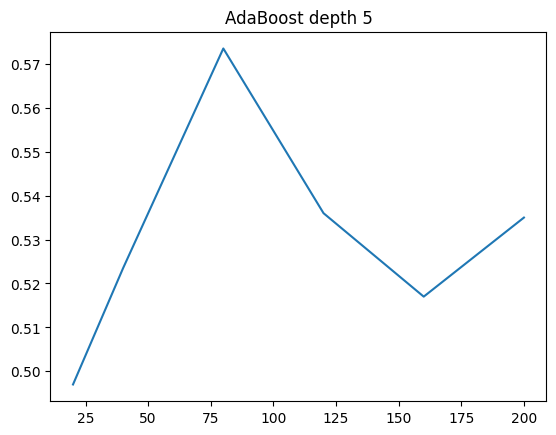

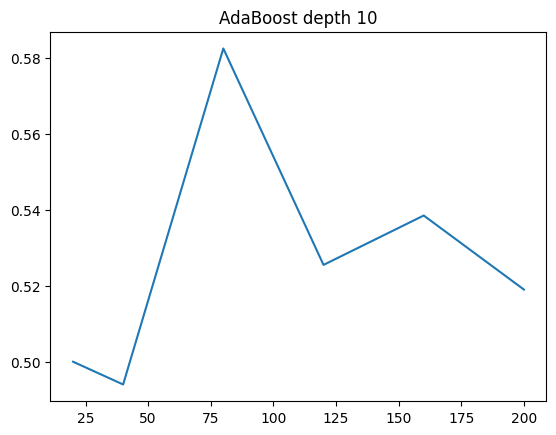

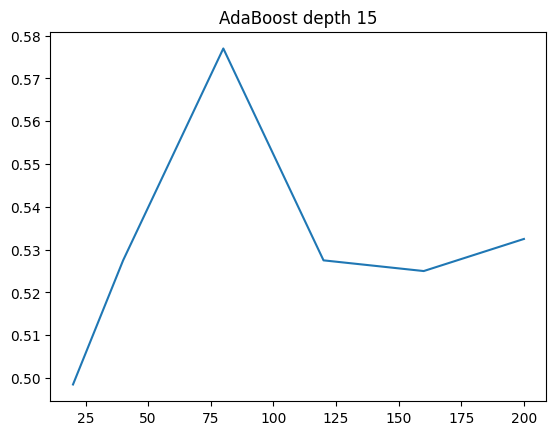

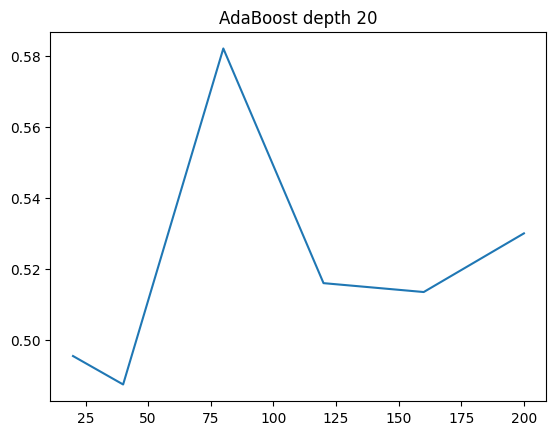

In [31]:
n_estimators = [20, 40, 80, 120, 160, 200]
max_depth = [5, 10, 15, 20]

for i, depth in enumerate(max_depth):
    scoring = []
    tree = DecisionTreeClassifier(random_state=42, max_depth = depth)
    for j, n_estim in enumerate(n_estimators):
        abc = AdaBoostClassifier(estimator = cur_tree,n_estimators=n_estim,
                                     learning_rate=1.0)
        model = abc.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scoring.append(metrics.accuracy_score(y_test, y_pred))

    plt.plot(n_estimators, scoring)
    plt.title(f"AdaBoost depth {depth}")
    plt.show()

In [32]:
import pickle

filename = "./models/AdaBoost_100_6.pickle"
pickle.dump(model, open(filename, "wb"))

# 3. GradientBoosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100,
                                         max_depth = 6, random_state=42)

model = gbc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.645


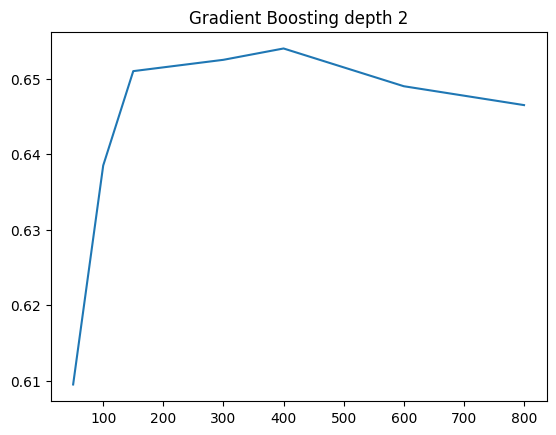

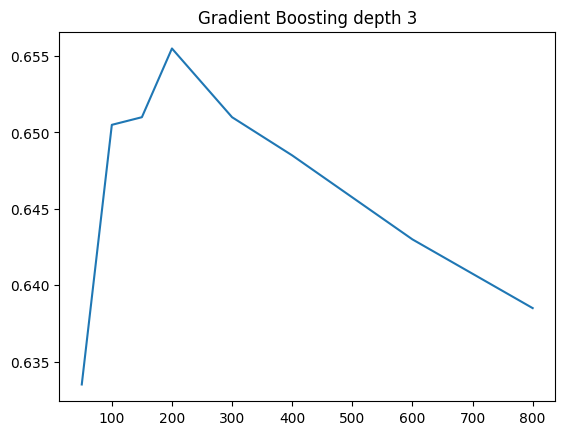

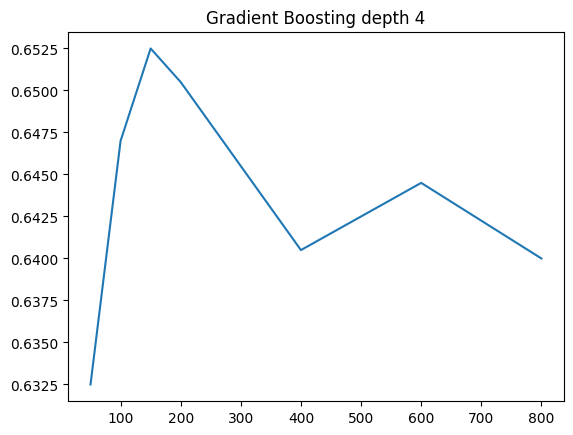

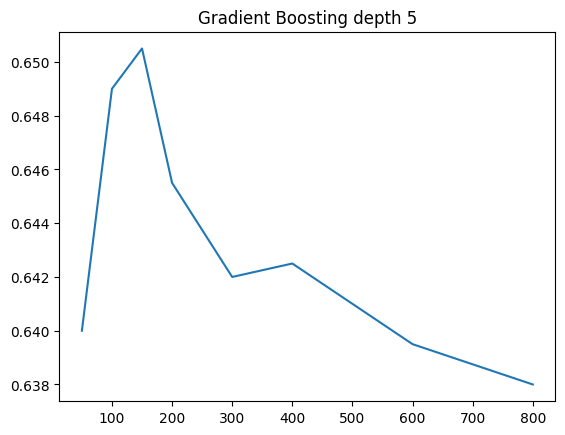

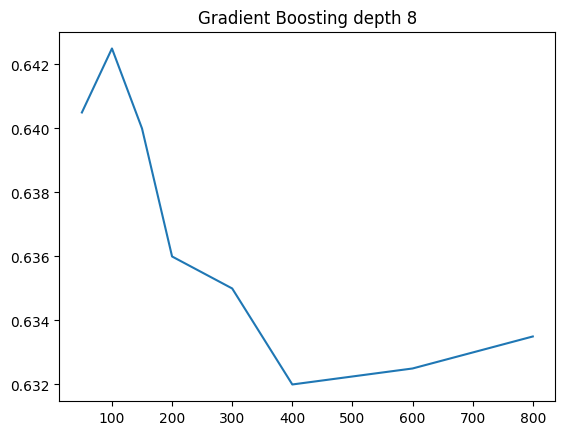

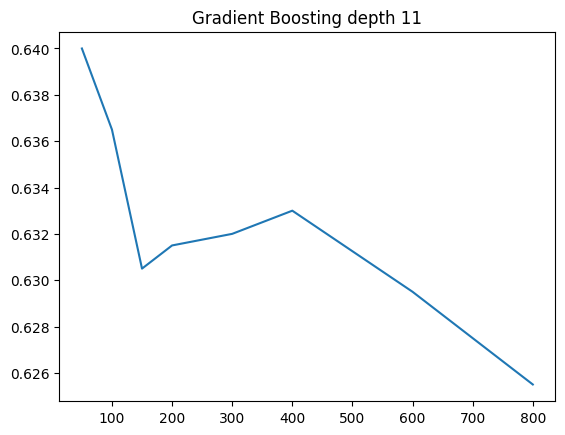

In [40]:
n_estimators = [50, 100, 150, 200, 300, 400, 600, 800]
max_depth = [2, 3, 4, 5, 8, 11]

for i, depth in enumerate(max_depth):
    scoring = []
    for j, n_estim in enumerate(n_estimators):
        gbc = GradientBoostingClassifier(n_estimators = n_estim,
                                         max_depth = depth, random_state=42)
        model = gbc.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scoring.append(metrics.accuracy_score(y_test, y_pred))

    plt.plot(n_estimators, scoring)
    plt.title(f"Gradient Boosting depth {depth}")
    plt.show()

In [ ]:
filename = "./models/GBC_100_6.pickle"

pickle.dump(model, open(filename, "wb"))
#loaded_model = pickle.load(open(filename, "rb"))

In [27]:
X_train_0, X_train_1, y_train_0, y_train_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# 3. Blending

__HW__ тут надо увеличить score (попробовать над Gradient boosting)

In [63]:
from sklearn.ensemble import RandomForestClassifier

N = 10
y_pred_1 = []
crf = []
for n in range(1,N+1):
    crf.append(RandomForestClassifier(n_estimators = 2,max_depth=2, random_state=n))
    crf[-1].fit(X_train_0,y_train_0)
    y_pred_1.append(crf[-1].predict(X_train_1).reshape(len(X_train_1),1))

In [64]:
y_pred_1t = np.array(y_pred_1).transpose()[0]
#y_pred_1 = hstack(y_pred_1)
len(y_pred_1t[0])

10

In [65]:
len(y_pred_1t)

5280

In [66]:
clf_final = RandomForestClassifier(n_estimators = 10, max_depth=6, random_state=42)

In [67]:
clf_final.fit(y_pred_1t,y_train_1)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

In [68]:
def make_blending_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

y_test_pred = make_blending_prediction(crf,clf_final, X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.405

In [69]:
metrics.accuracy_score(y_test, crf[0].predict(X_test))

0.362

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

N = 10
y_pred_1 = []
crf = []
for n in range(1,N+1):
    crf.append(GradientBoostingClassifier(n_estimators = 200, max_depth = 3, random_state=42+n))
    crf[-1].fit(X_train_0,y_train_0)
    y_pred_1.append(crf[-1].predict(X_train_1).reshape(len(X_train_1),1))

In [43]:
import numpy as np

In [44]:
y_pred_1t = np.array(y_pred_1).transpose()[0]
#y_pred_1 = hstack(y_pred_1)
print(len(y_pred_1t[0]))
len(y_pred_1t)

10


5280

In [102]:
np.where(np.array(y_train_1) == 1)[0]

array([   1,    3,   12, ..., 5274, 5275, 5277])

In [105]:
test_values = np.unique(y_train_1)
test_indexes = []
y_train_arr = np.array(y_train_1)
for test_value in test_values:
    test_indexes.append(np.where(y_train_arr == test_value)[0])
test_indexes

[array([   0,    2,    4, ..., 5269, 5273, 5279]),
 array([   1,    3,   12, ..., 5274, 5275, 5277]),
 array([   8,   18,   25,   26,   32,   34,   46,   75,   77,   89,   90,
          98,  101,  115,  121,  142,  158,  164,  179,  186,  209,  219,
         242,  251,  268,  273,  310,  321,  324,  329,  330,  333,  357,
         364,  367,  397,  407,  418,  428,  431,  435,  465,  475,  492,
         506,  510,  527,  533,  549,  557,  558,  562,  575,  579,  580,
         583,  588,  594,  607,  613,  615,  619,  647,  653,  654,  656,
         657,  663,  682,  690,  701,  707,  717,  744,  754,  758,  762,
         782,  787,  789,  825,  840,  871,  877,  894,  900,  908,  916,
         929,  935,  940,  958,  984,  987,  991, 1002, 1009, 1022, 1024,
        1033, 1052, 1061, 1068, 1075, 1078, 1085, 1096, 1097, 1109, 1119,
        1127, 1130, 1194, 1196, 1213, 1215, 1224, 1225, 1241, 1243, 1255,
        1262, 1281, 1288, 1306, 1307, 1345, 1358, 1364, 1371, 1380, 1385,
        13

In [110]:
len(y_pred_1t[:, 0][test_indexes[0]])

1559

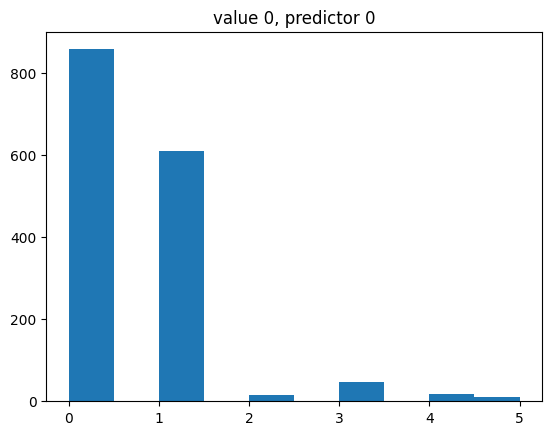

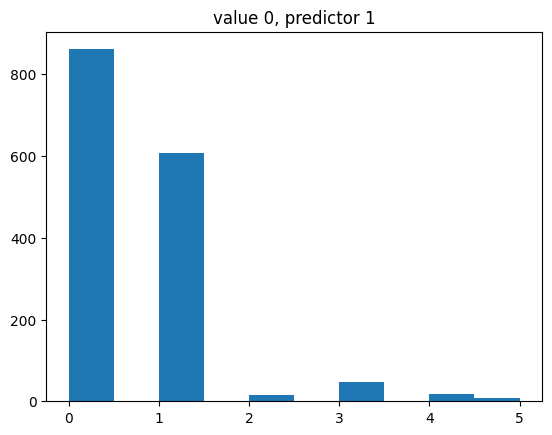

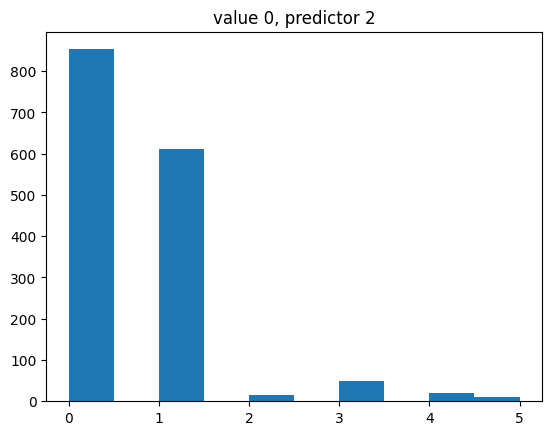

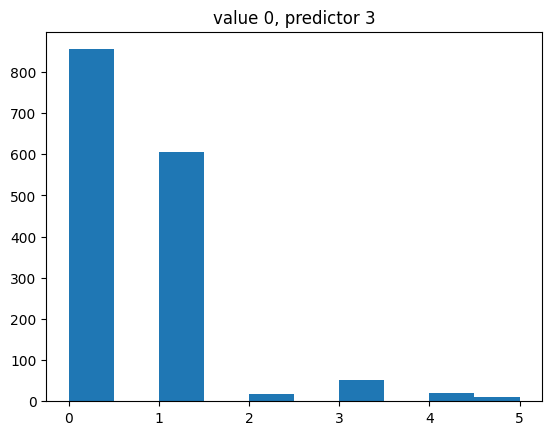

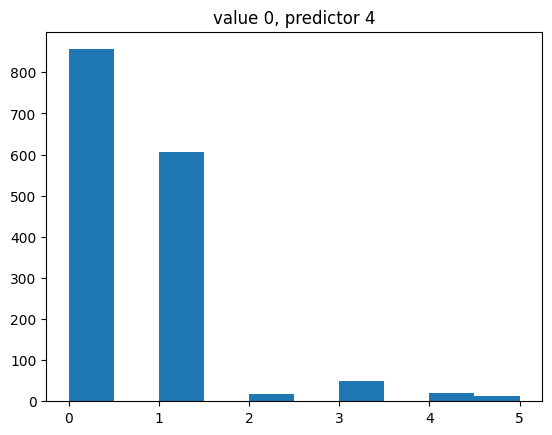

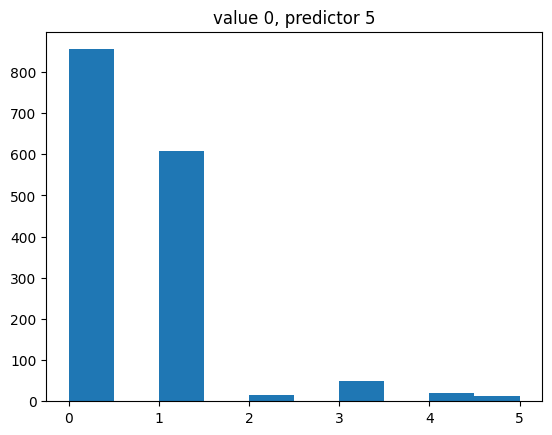

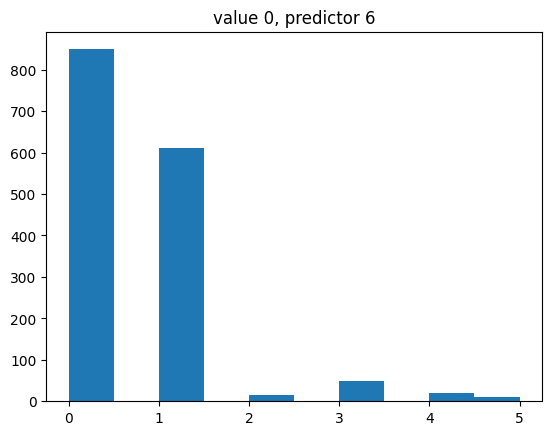

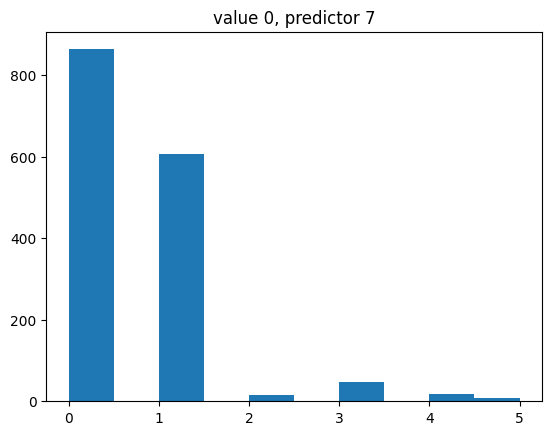

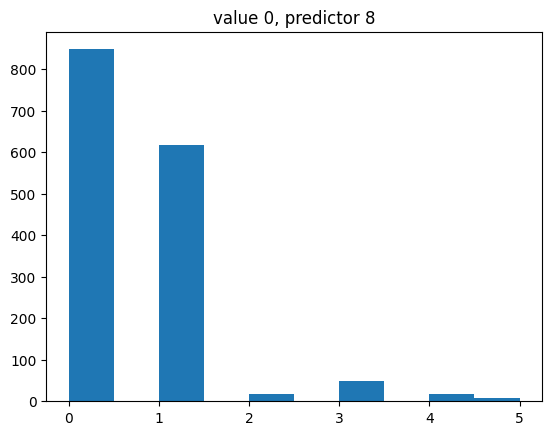

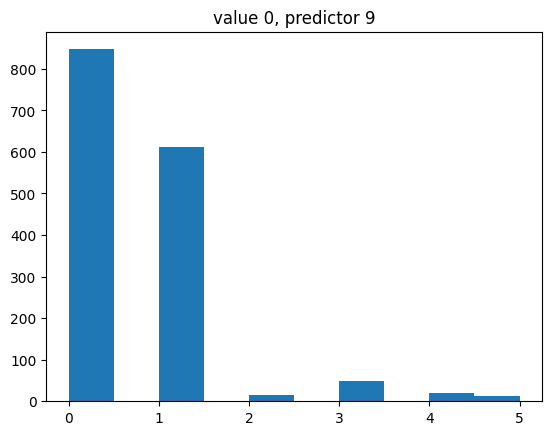

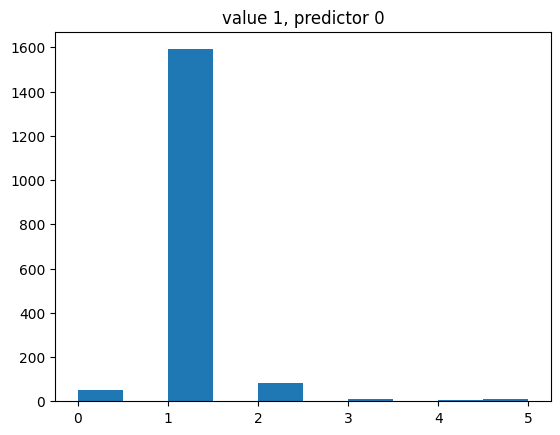

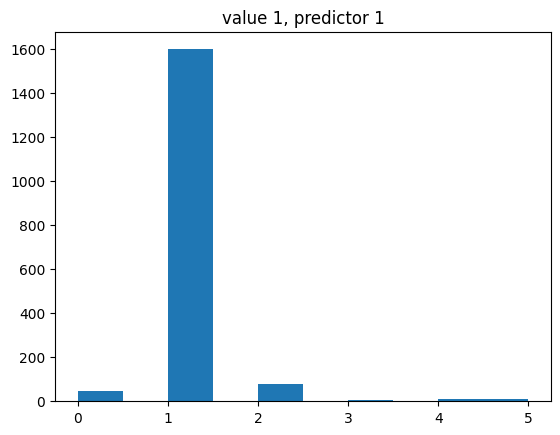

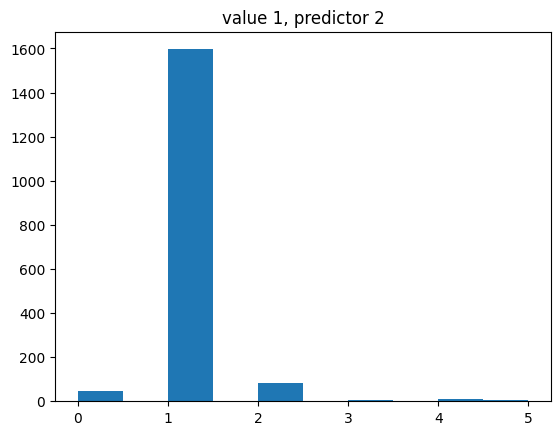

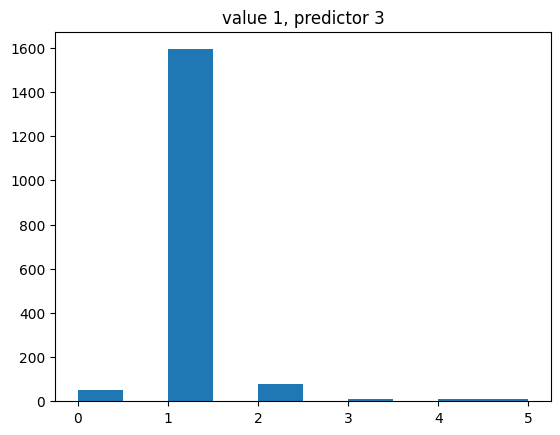

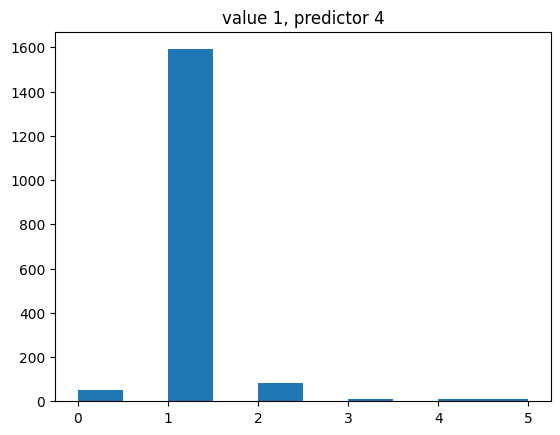

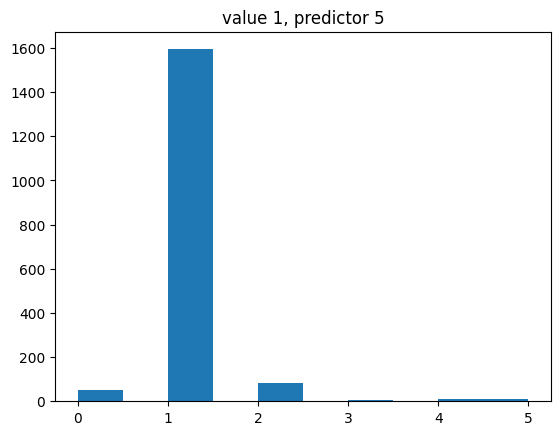

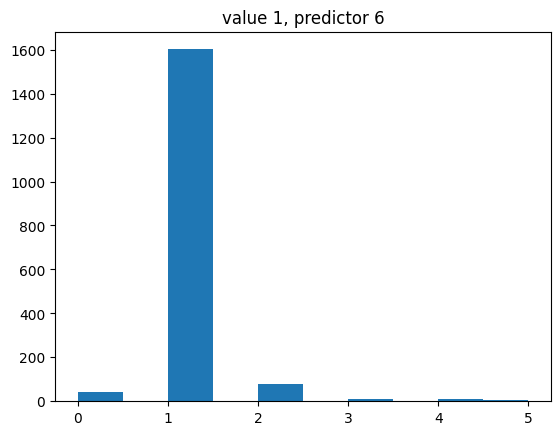

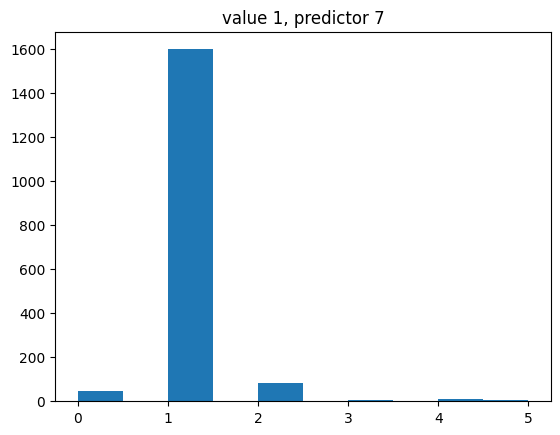

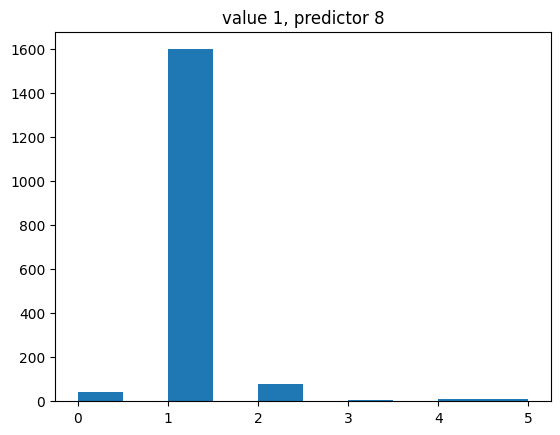

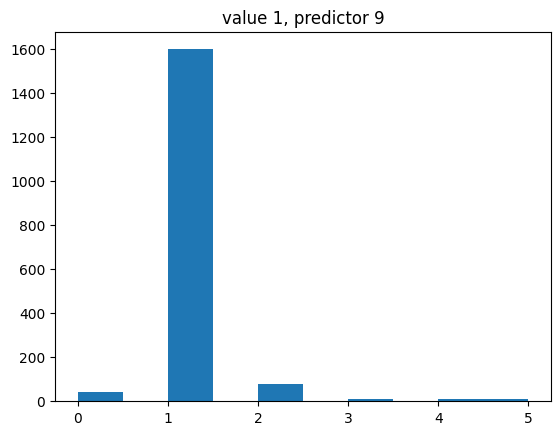

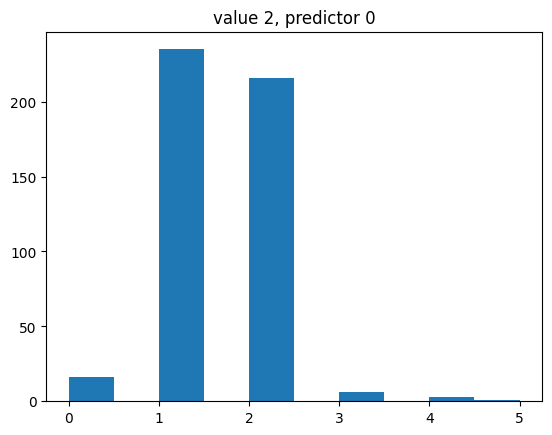

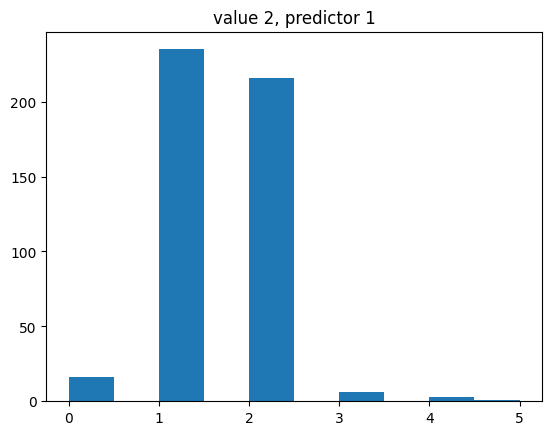

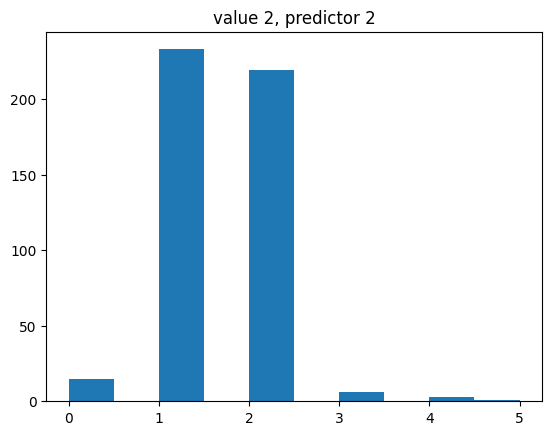

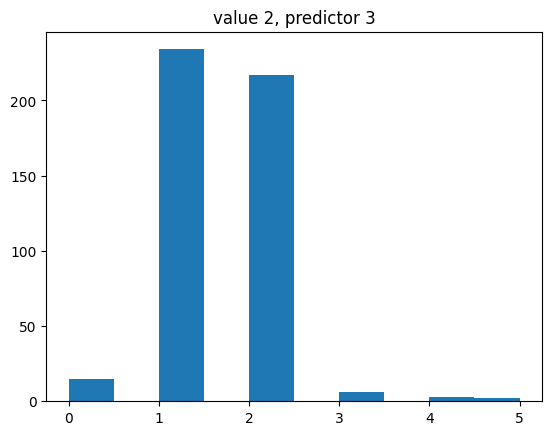

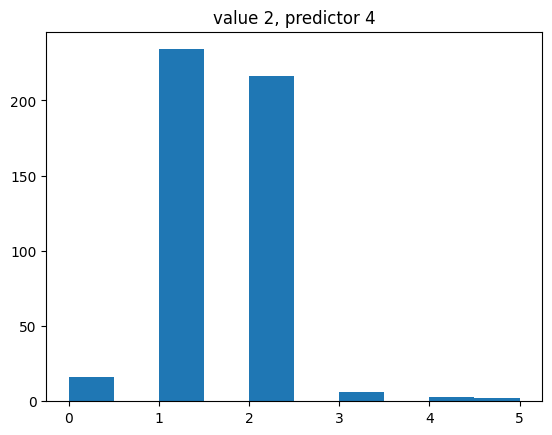

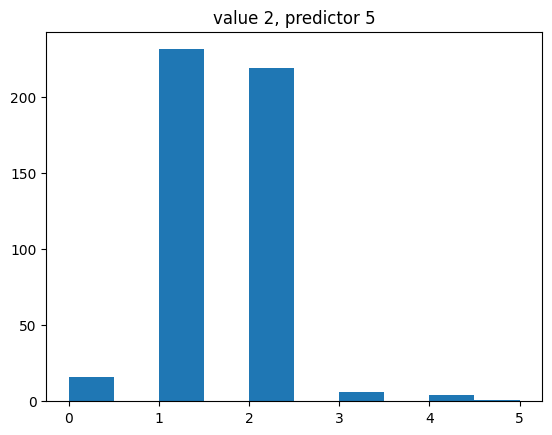

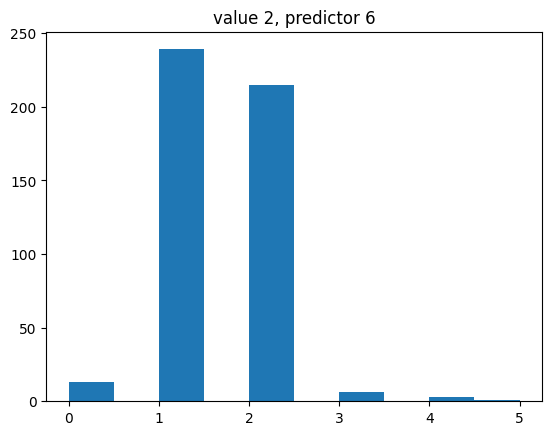

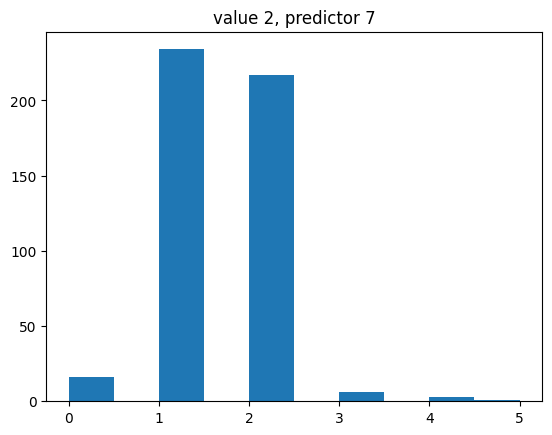

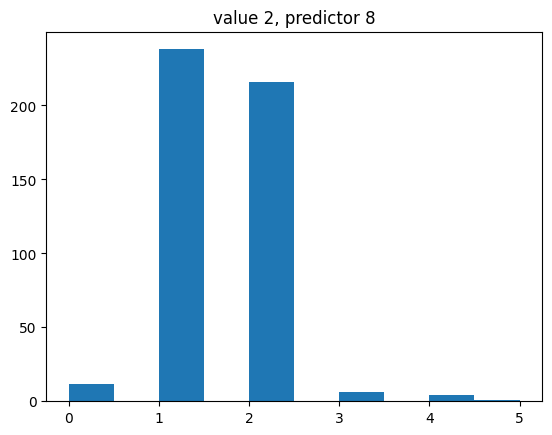

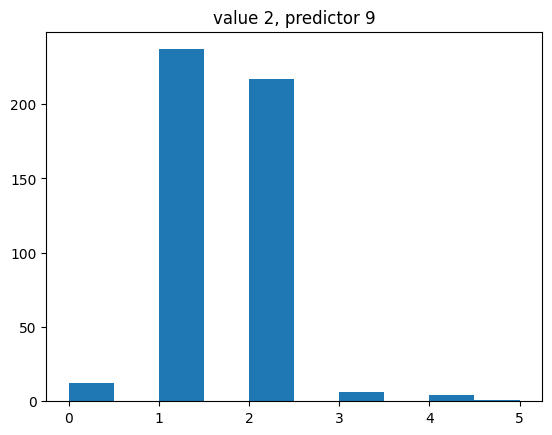

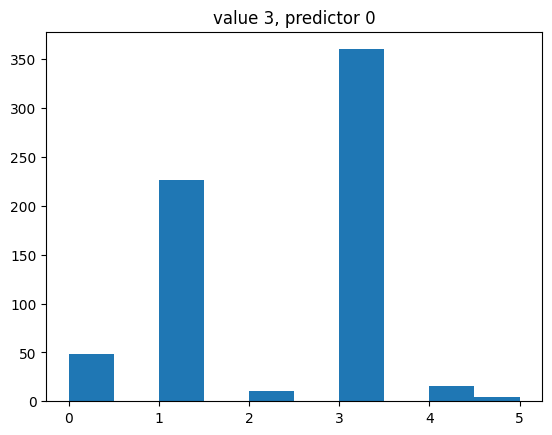

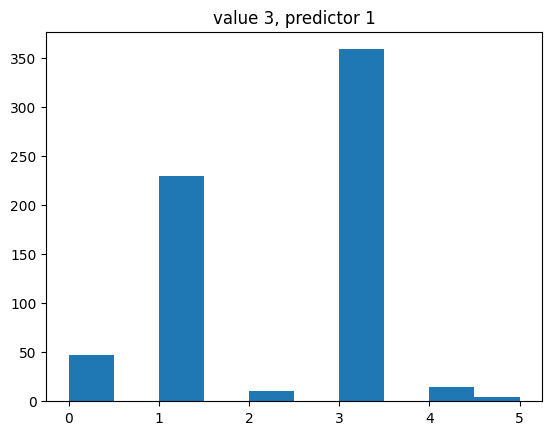

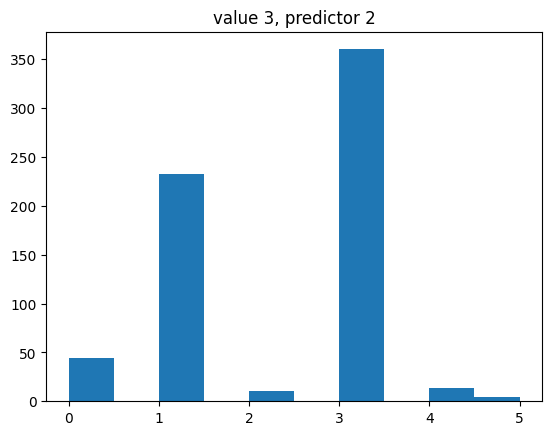

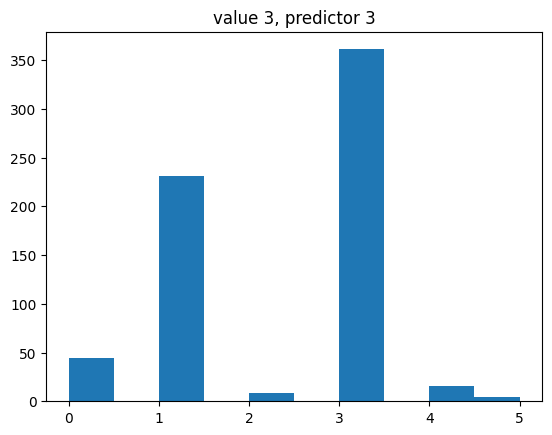

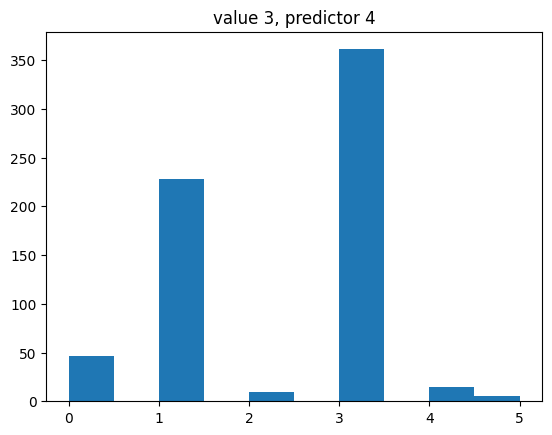

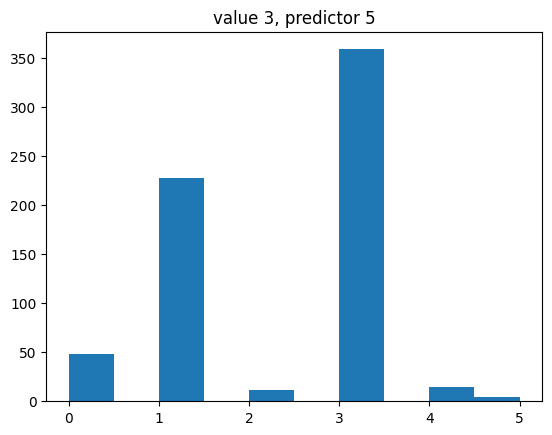

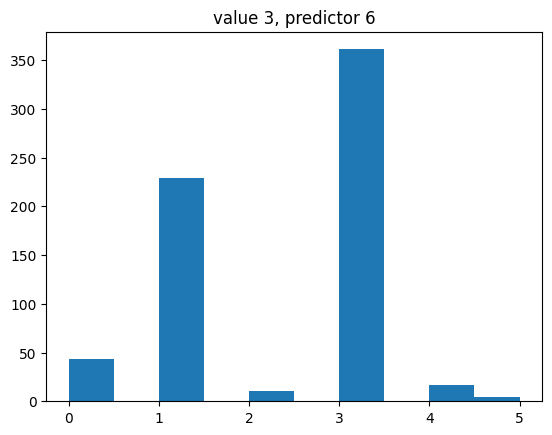

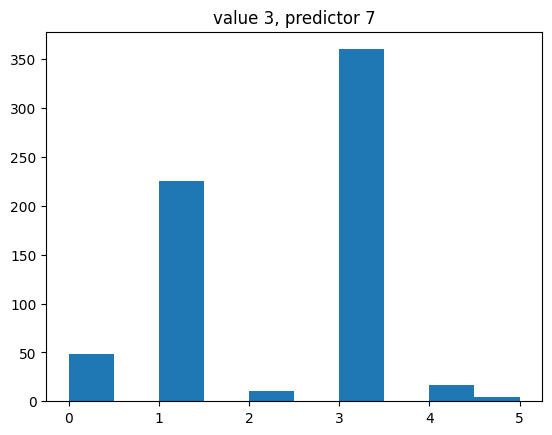

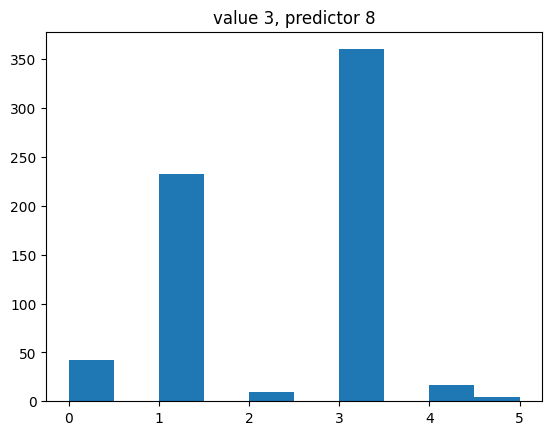

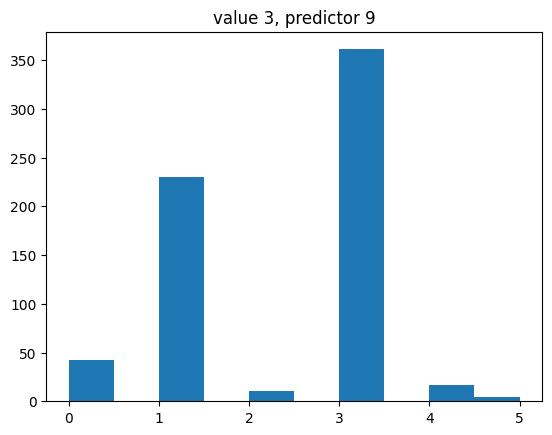

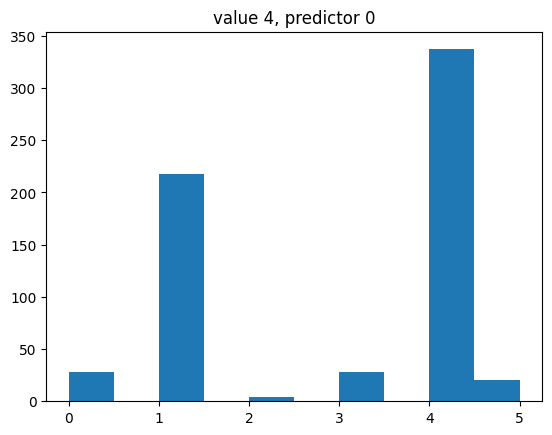

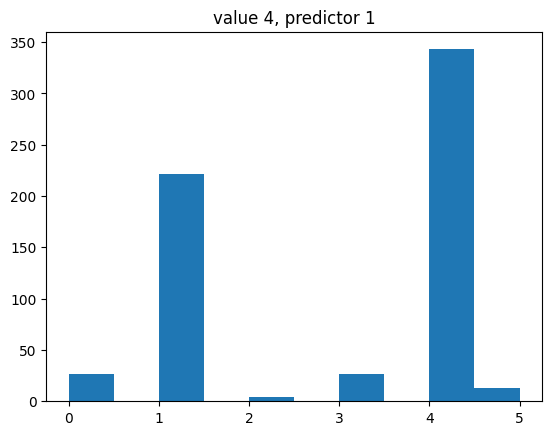

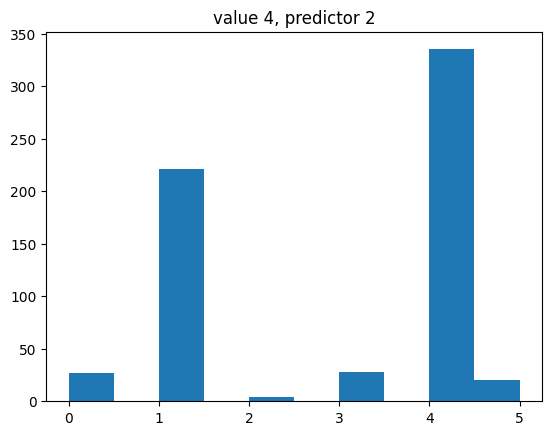

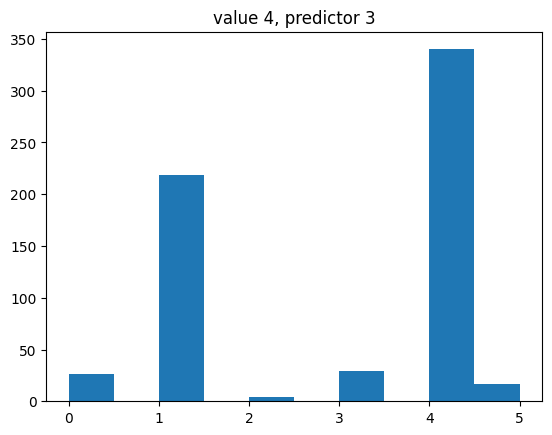

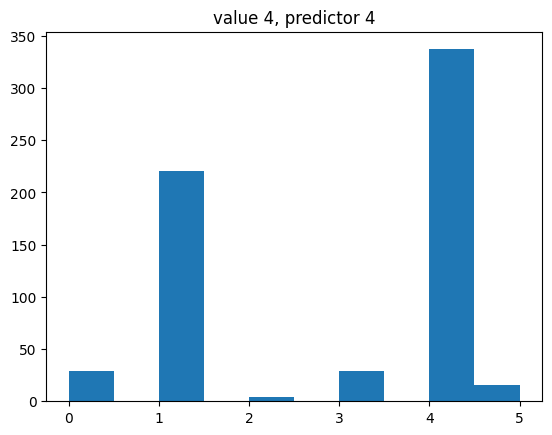

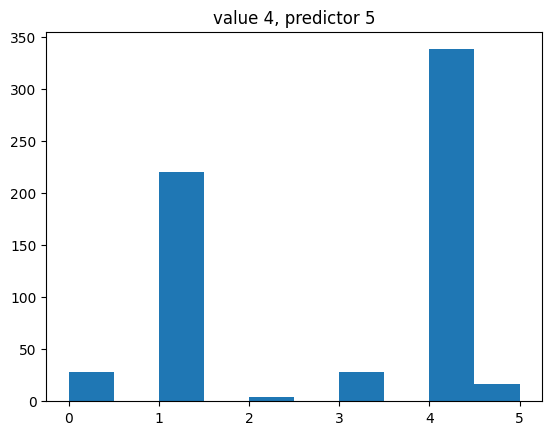

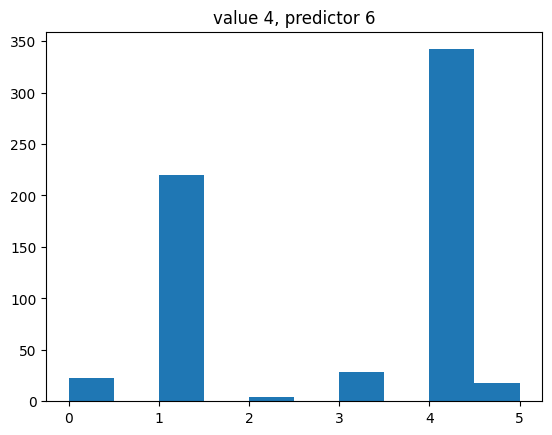

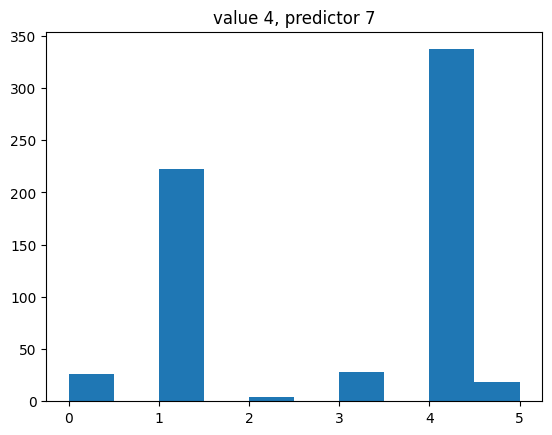

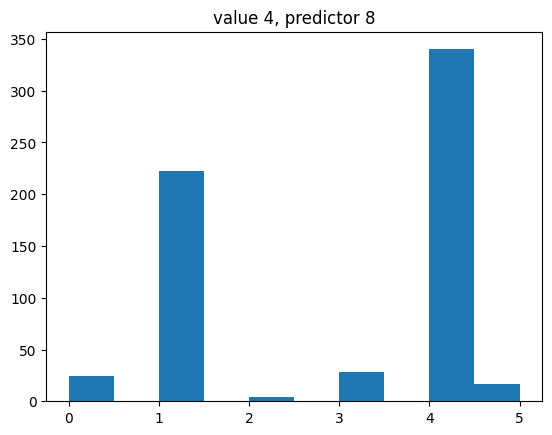

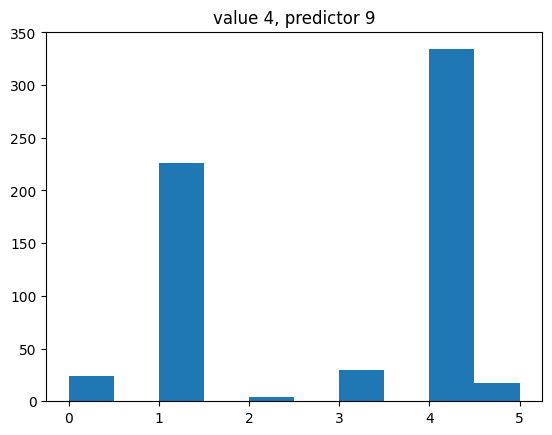

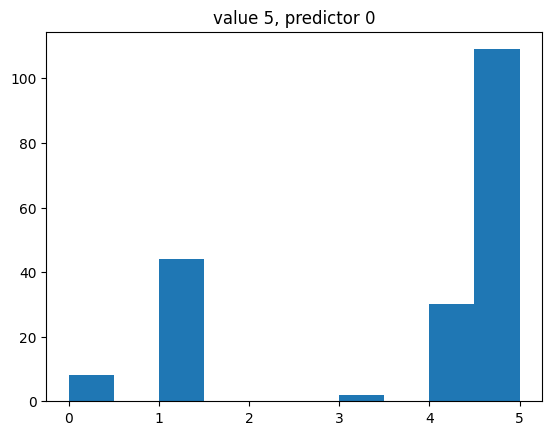

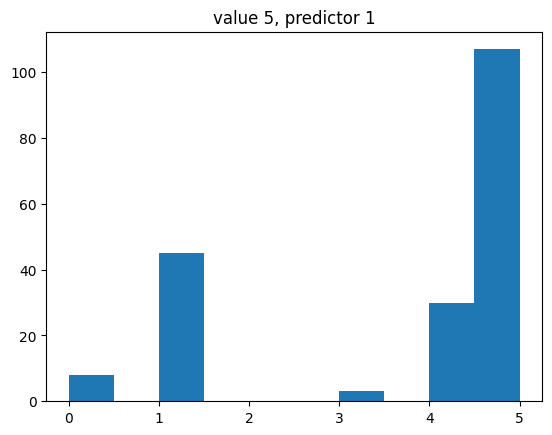

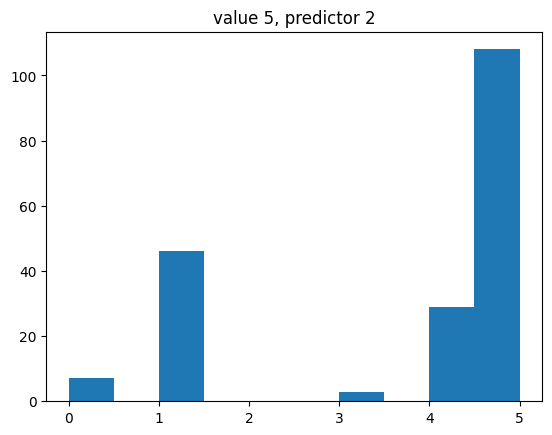

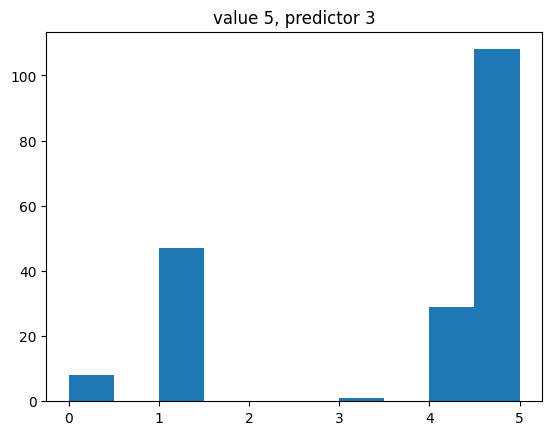

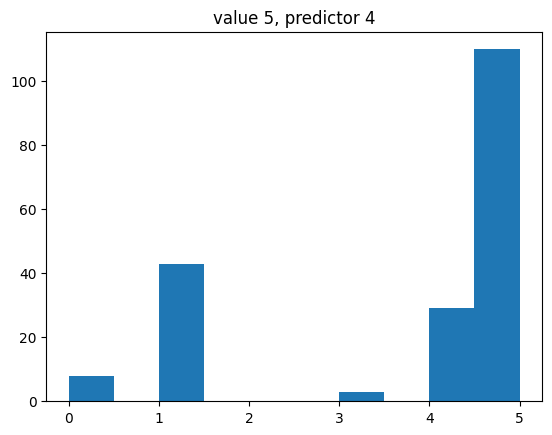

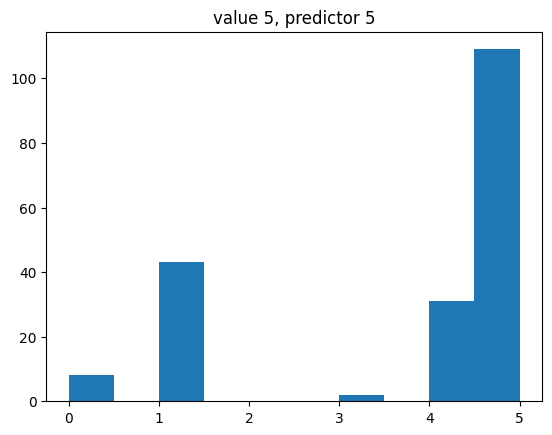

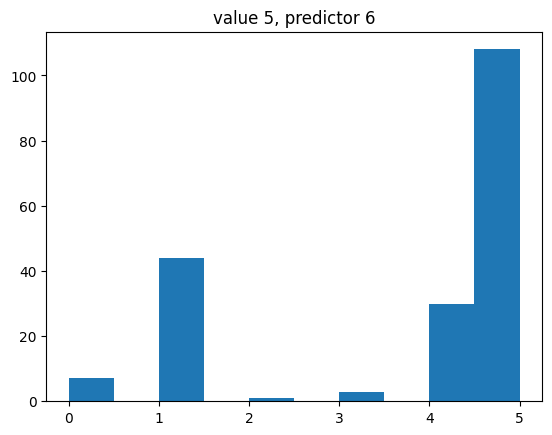

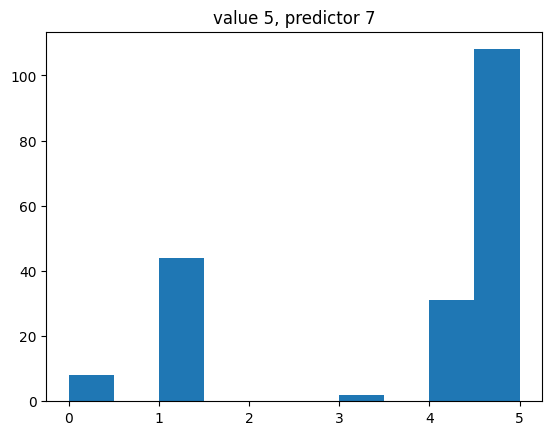

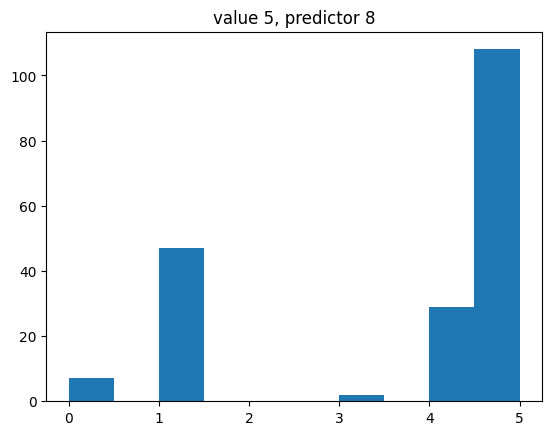

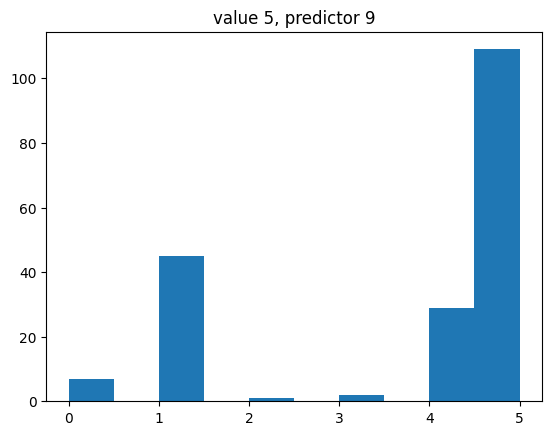

In [115]:
for j in range(len(test_indexes)):
    for i in range(len(y_pred_1t[0])):
        plt.hist(y_pred_1t[:, i][test_indexes[j]])
        # plt.grid()
        plt.title(f"value {j}, predictor {i}")
        plt.show()
# plt.plot(range(10), y_pred_1t[4, :], c=np.random.rand(4,))


__Вывод__ - хорошо предсказывается только метка 1 (ее ловят все предикторы). В остальных они на одну метку могут дать два ответа  (причем каждый из них). Причем на значении 2 они все с большей вероятностью дадут неправильный ответ => нужны другие алгоритмы

In [98]:
np.unique(y_train_1)

array([0, 1, 2, 3, 4, 5])

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
clf_final = LinearRegression()
clf_final.fit(y_pred_1t,y_train_1)

LinearRegression()

In [97]:
def make_blending_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        print(np.unique(c.predict(data)))
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

y_test_pred = make_blending_prediction(crf,clf_final, X_test)
print(np.unique(y_test_pred))
y_test_pred = y_test_pred.round().astype(int)
np.unique(y_test_pred)

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0.39299737 0.4381703  0.59619071 0.61111415 0.68425838 0.72467539
 0.7636946  0.89774519 0.91418397 0.91452235 0.9174575  0.9209192
 0.967076   0.98798801 1.05785758 1.06643811 1.07883754 1.12348342
 1.18652269 1.19813229 1.22599792 1.23854929 1.24013045 1.26064451
 1.28567575 1.34420472 1.41126625 1.47886964 1.484299   1.49706231
 1.537547   1.56817756 1.65190126 1.68273641 1.71918998 1.8783511
 1.93859091 1.96305472 1.96707888 2.03892828 2.08410121 2.12053947
 2.15822303 2.19864003 2.20041621 2.30527843 2.36855655 2.39561048
 2.45262271 2.54065682 2.54277594 2.58079425 2.59966367 2.60813703
 2.6279964  2.83930727 2.92965312 2.93964464 2.95946744 2.9967466
 3.01991486 3.33698774 3.39544102 3.41058659 3.47521858 3.47997451
 3.58679423 3.59137548 3.63654841 3.63968626 3.68485918 3.75984643
 3.76247632 3.84770878 3.86598662 3.93336591 4.15442559 4.2

array([0, 1, 2, 3, 4])

на линейном плохо, вообще метку 5 не отлавливает

In [85]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.accuracy_score(y_test, crf[0].predict(X_test)))

0.6205
0.6465


In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf_final = RandomForestClassifier(n_estimators = 10,max_depth=5, random_state=42)
clf_final.fit(y_pred_1t,y_train_1)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [88]:
def make_blending_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

y_test_pred = make_blending_prediction(crf,clf_final, X_test)
np.unique(y_test_pred)

array([0, 1, 2, 3, 4, 5])

In [89]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.accuracy_score(y_test, crf[0].predict(X_test)))

0.649
0.6465


# 4. Stacking

__HW__ то же что по блендингу

In [26]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier

N = 10
y_pred_1 = []
crf_stack = []
kf = KFold(n_splits=N, random_state=None, shuffle=False)

x_test_2 = []
y_test_2 = []

pre_prediction = np.zeros((len(X_train), N))

for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_0, X_test_1 = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train_0, y_test_1 = np.array(y_train)[train_index], np.array(y_train)[test_index]
    
    crf_stack.append(RandomForestClassifier(n_estimators = 2,max_depth=2, random_state=i))
    crf_stack[-1].fit(X_train_0,y_train_0)
    pre_prediction[test_index,i]=crf_stack[-1].predict(X_test_1)

In [27]:
pre_prediction[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
clf_stack_final = RandomForestClassifier(n_estimators = 10,max_depth=6, random_state=42)

In [29]:
clf_stack_final.fit(pre_prediction,y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

In [30]:
def make_stacking_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

y_test_pred = make_stacking_prediction(crf_stack,clf_stack_final, X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.413

In [31]:
metrics.accuracy_score(y_test, crf_stack[0].predict(X_test))

0.368

In [32]:
skf = StratifiedKFold(n_splits=N, random_state=None, shuffle=False)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
N = 10
y_pred_1 = []
crf_stack = []
x_test_2 = []
y_test_2 = []

pre_prediction = np.zeros((len(X_train), N))

for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_0, X_test_1 = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train_0, y_test_1 = np.array(y_train)[train_index], np.array(y_train)[test_index]
    
    crf_stack.append(GradientBoostingClassifier(n_estimators = 200, max_depth = 3, random_state=42+i))
    crf_stack[-1].fit(X_train_0,y_train_0)
    pre_prediction[test_index,i]=crf_stack[-1].predict(X_test_1)

In [41]:
clf_stack_final = RandomForestClassifier(n_estimators = 10,max_depth=6, random_state=42)

In [42]:
clf_stack_final.fit(pre_prediction,y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

In [43]:
y_test_pred = make_stacking_prediction(crf_stack,clf_stack_final, X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.4955

In [44]:
metrics.accuracy_score(y_test, crf_stack[0].predict(X_test))

0.654